## This is a supervised classification problem where KNN is used to predict the class label based on two numerical features. KNN is chosen because the dataset is small and distance-based classification is suitable.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\vchan\Downloads\knn_sample_dataset.csv")
df

,Feature_1,Feature_2,Target
0,0.733246,-1.431007,0
1,0.656043,0.842841,1
2,0.537983,-2.056550,0
3,1.289308,-0.079023,1
4,0.720124,0.977237,1
...,...,...,...
295,1.959063,1.482682,1
296,0.988996,-0.914247,0
297,2.046521,0.268611,1
298,0.122447,0.742480,1


In [21]:
df.shape

(300, 3)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  300 non-null    float64
 1   Feature_2  300 non-null    float64
 2   Target     300 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


In [23]:
df.describe()

,Feature_1,Feature_2,Target
count,300.000000,300.000000,300.000000
mean,0.967604,0.007175,0.500000
std,0.607250,1.229816,0.500835
min,-1.062240,-2.823751,0.000000
25%,0.621191,-1.089332,0.000000
50%,0.952689,-0.108417,0.500000
75%,1.289528,1.045620,1.000000
max,2.961783,2.885964,1.000000


### The dataset contains 300 rows and 3 numerical features. There are no missing values, making it suitable for KNN without imputation.

### Visually Looking at features

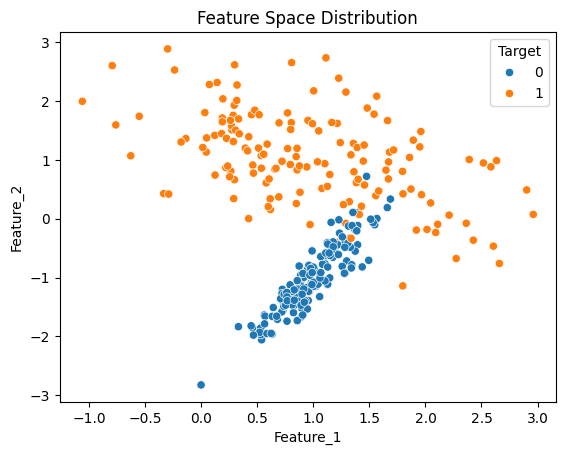

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['Feature_1'],y=df['Feature_2'],hue=df['Target'])
plt.title("Feature Space Distribution")
plt.show()

## Machine Learning Part

In [3]:
X = df[['Feature_1','Feature_2']]
y = df['Target']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
y_pred = model.predict(X_test_scaled)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.95
[[28  1]
 [ 2 29]]


In [20]:
for k in [1,2,3,4,5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred = knn.predict(X_test_scaled)
    print(f'k = {k}, accuracy score: {accuracy_score(y_test,y_pred)}')

k = 1, accuracy score: 0.9
k = 2, accuracy score: 0.9333333333333333
k = 3, accuracy score: 0.95
k = 4, accuracy score: 0.9333333333333333
k = 5, accuracy score: 0.95


## Therefore the k = 5 is best possible outcome